In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
!pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import numpy as np
import pandas as pd
import smogn
#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")
d=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.31_Final_Original.csv")

dataset = smogn.smoter(
    
    data = d, 
    y = "WOMAC_total"
)

r_index: 100%|##########| 2/2 [00:00<00:00,  2.77it/s]


In [52]:
dataset.head(10)

,Patient ID,Data Type,Bone-Attribution,WOMAC_Pain,WOMAC_Pain Grade,WOMAC_Stiffness,WOMAC_Stiffness Grade,WOMAC_Physical function,WOMAC_MHhysical function Grade,WOMAC_total,...,TA-G-100,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,13485,Testing,O,12,Moderate,1,Mild,51,Severe,65,...,78.656365,20.123009,196.699005,21.006327,117.939988,81.728309,114.612211,5.435444,0.422847,5.580294
1,14065,Testing,O,9,Moderate,5,Mild,49,Severe,65,...,47.253740,31.175549,300.611057,29.846173,67.175346,338.744805,82.937925,2.423678,1.132068,2.895231
2,14073,Testing,O,9,Moderate,5,Mild,50,Severe,65,...,42.607373,136.356155,160.018241,123.397645,84.807004,74.767638,112.069042,0.628604,0.464252,0.922927
3,14461,Testing,O,14,Moderate,6,Mild,46,Severe,66,...,86.915418,100.266741,71.212843,89.453128,105.568989,54.426350,169.481963,1.133042,0.743414,1.967152
4,14445,Testing,O,15,Moderate,6,Mild,45,Severe,67,...,871.497093,246.821955,74.643102,478.756914,324.030721,15.272436,803.349787,1.308793,0.186230,1.707422
5,13239,Testing,O,9,Moderate,5,Mild,51,Severe,68,...,98.551497,96.821216,140.752042,98.373073,221.723301,26.609316,219.408417,2.334111,0.190987,2.265866
6,13361,Testing,O,14,Moderate,6,Mild,50,Severe,70,...,98.489706,124.539875,133.757747,125.923167,114.389773,112.144614,125.312593,0.850944,0.816519,1.036764
7,13360,Testing,O,14,Moderate,5,Mild,50,Severe,70,...,56.018363,286.588997,105.762750,135.337854,157.252096,75.848425,182.233749,0.511428,0.699280,1.340500
8,13508,Testing,O,14,Moderate,5,Mild,50,Severe,69,...,205.664698,79.291476,63.628704,159.163007,111.147662,24.517277,328.692634,1.366880,0.366722,2.040603
9,14150,Testing,O,12,Moderate,6,Mild,51,Severe,70,...,260.881687,224.975332,100.927286,256.691829,278.480581,35.854337,411.105089,1.229147,0.352158,1.522889


In [53]:
dataset.shape

(151, 812)

In [54]:
X = dataset.iloc[:,17:]
y = dataset.iloc[:, 9]

In [55]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [56]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

Features [21 22 23 24] are constant.
invalid value encountered in true_divide


In [57]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [58]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [59]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 20


In [60]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

              Specs      Score
779         TA-G-94  11.736694
778         TA-G-93  11.396534
777         TA-G-92  11.296619
780         TA-G-95  11.107586
782         TA-G-97  10.738621
776         TA-G-91  10.707220
781         TA-G-96  10.674709
783         TA-G-98  10.661359
785        TA-G-100  10.608737
784         TA-G-99  10.561625
775         TA-G-90   8.795123
774         TA-G-89   6.652453
791  Swing_CCI_TA-G   6.118967
773         TA-G-88   5.108688
772         TA-G-87   4.311028
685          TA-G-0   4.185867
12        Step_Time   4.027621
686          TA-G-1   3.779138
771         TA-G-86   3.722746
8           Cadence   3.709412


In [61]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [62]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 9]

In [63]:
X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


#Taining Ploting and Result

In [65]:
y_pred_train = lin_reg.predict(X_train)

print(y_pred.shape)
from sklearn.metrics import r2_score,mean_squared_error
print("Training r2: ",r2_score(y_train,y_pred_train))


r_sq = lin_reg.score(X_new, y_new)
print("Training r_sq: ",r_sq)





(31,)
Training r2:  0.3313989315677487
Training r_sq:  0.1991713853669409


In [66]:
r_sq_train = lin_reg.score(X_train, y_pred_train)
print(r_sq_train)

1.0


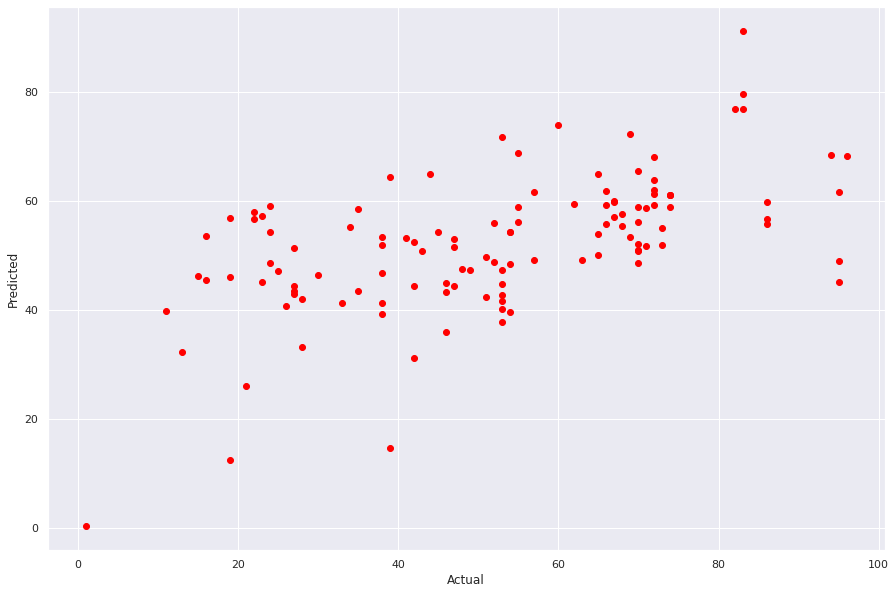

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred_train, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [68]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_train,
        "Predicted Value":y_pred_train,
        "Difference":y_train-y_pred_train
    }
)

pred_y_df

,Actual Value,Predicted Value,Difference
0,65,64.839432,0.160568
1,65,53.970902,11.029098
2,65,50.024630,14.975370
3,66,59.151513,6.848487
4,67,57.080453,9.919547
...,...,...,...
136,47,44.443936,2.556064
138,51,42.351187,8.648813
139,52,55.836702,-3.836702
140,53,37.792701,15.207299


In [69]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred_train))



Mean squared error: 313.80
Coefficient of determination: 0.33


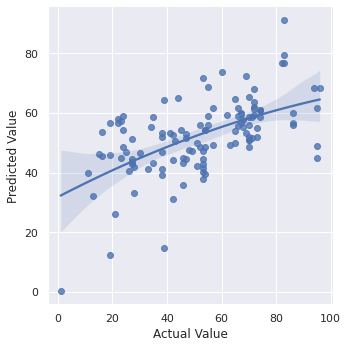

In [70]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)



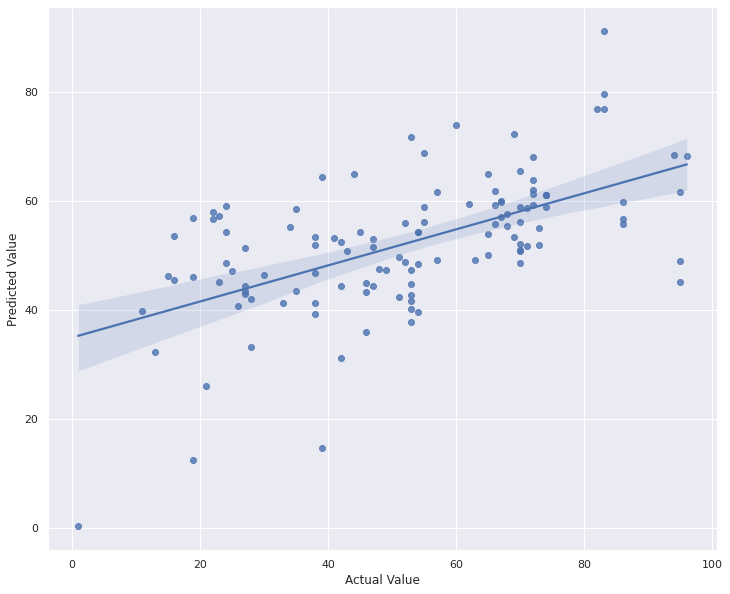

In [71]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);




#Testing Ploting and Result

In [72]:
y_pred_test = lin_reg.predict(X_test)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_test))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -0.8550295869429108
R_sq:  0.1991713853669409


In [73]:
r_sq_test = lin_reg.score(X_test, y_pred_test)
print(r_sq_test)

1.0


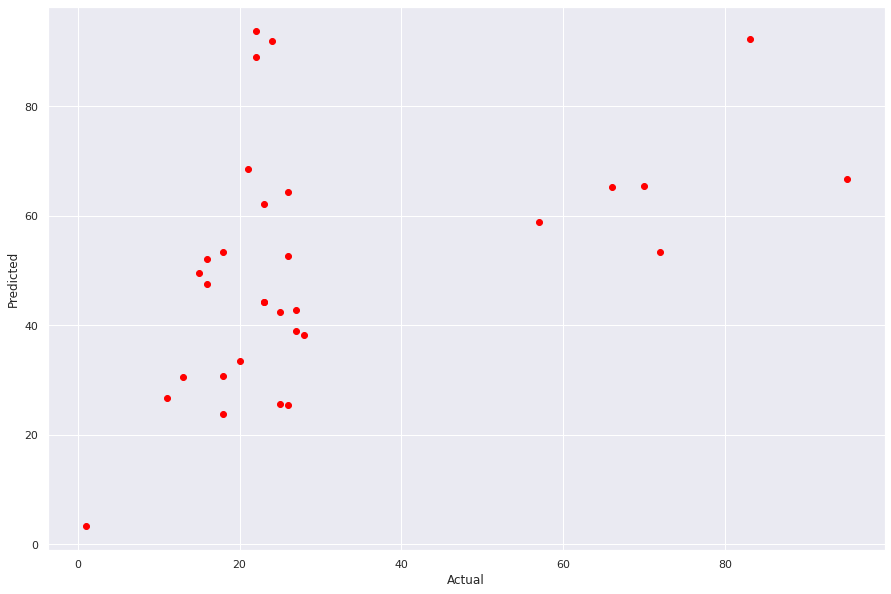

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [75]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_test,
        "Predicted Value":y_pred_test,
        "Difference":y_test-y_pred_test
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
142,57,58.862466,-1.862466
145,66,65.294454,0.705546
146,70,65.449729,4.550271
147,72,53.386658,18.613342
148,83,92.389376,-9.389376
149,95,66.712508,28.287492
0,1,3.404818,-2.404818
1,11,26.759025,-15.759025
2,13,30.463345,-17.463345
3,15,49.504452,-34.504452


In [76]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))


Mean squared error: 930.60
Coefficient of determination: -0.86


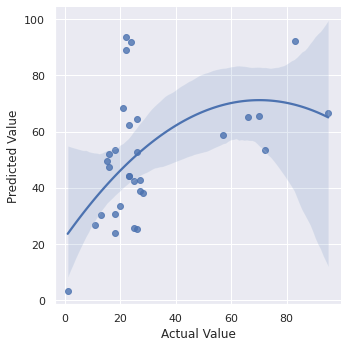

In [77]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)



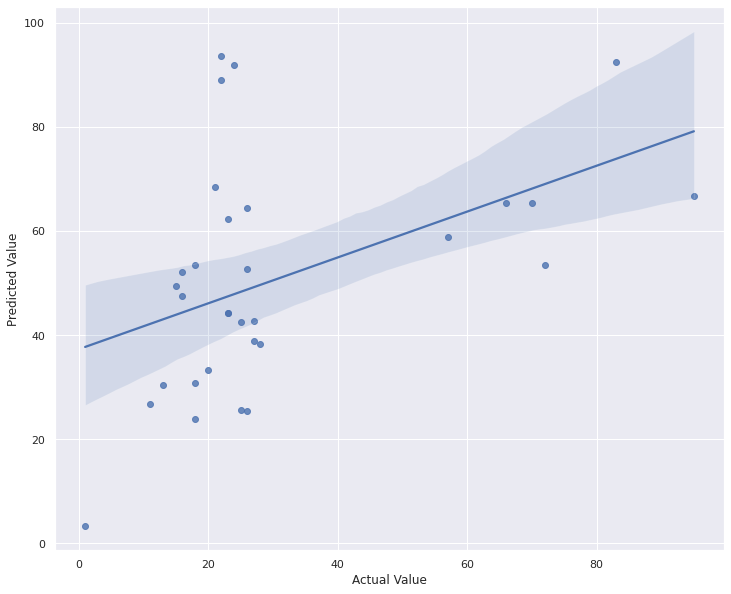

In [78]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

#Over All dataset Ploting and Results

In [79]:
y_pred_new = lin_reg.predict(X_new)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_new,y_pred_new))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  0.1991713853669409
R_sq:  0.1991713853669409


In [80]:
r_sq_test = lin_reg.score(X_new, y_pred_new)
print(r_sq_test)

1.0


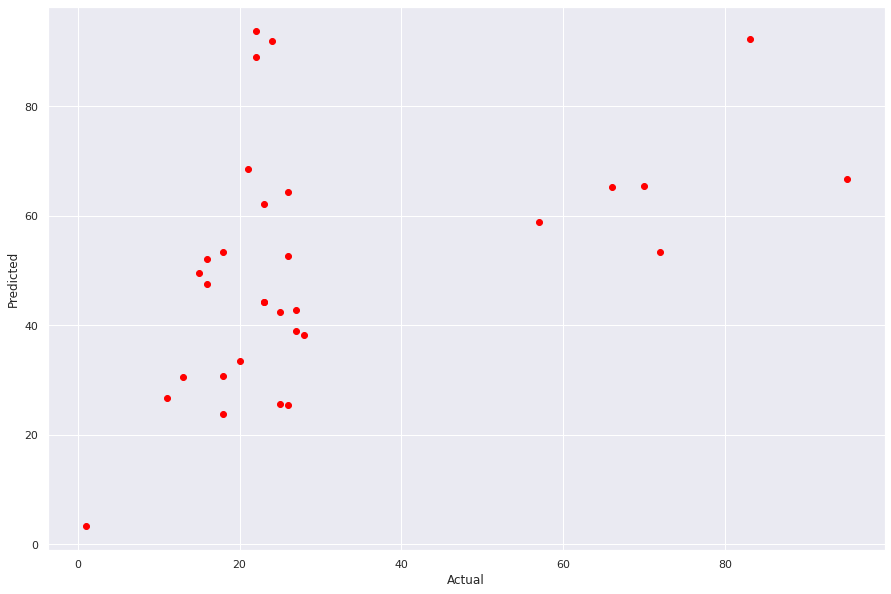

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [82]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_new,
        "Predicted Value":y_pred_new,
        "Difference":y_new-y_pred_new
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
0,65,64.839432,0.160568
1,65,53.970902,11.029098
2,65,50.024630,14.975370
3,66,59.151513,6.848487
4,67,57.080453,9.919547
...,...,...,...
20,26,52.637908,-26.637908
21,27,38.874983,-11.874983
22,26,25.413902,0.586098
23,28,38.277356,-10.277356


In [83]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_new, y_pred_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_new, y_pred_new))


Mean squared error: 440.43
Coefficient of determination: 0.20


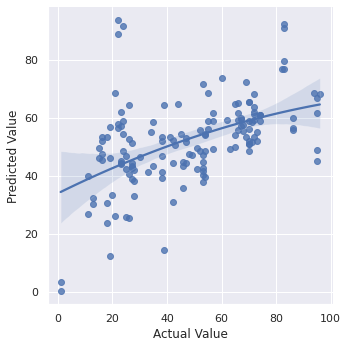

In [84]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

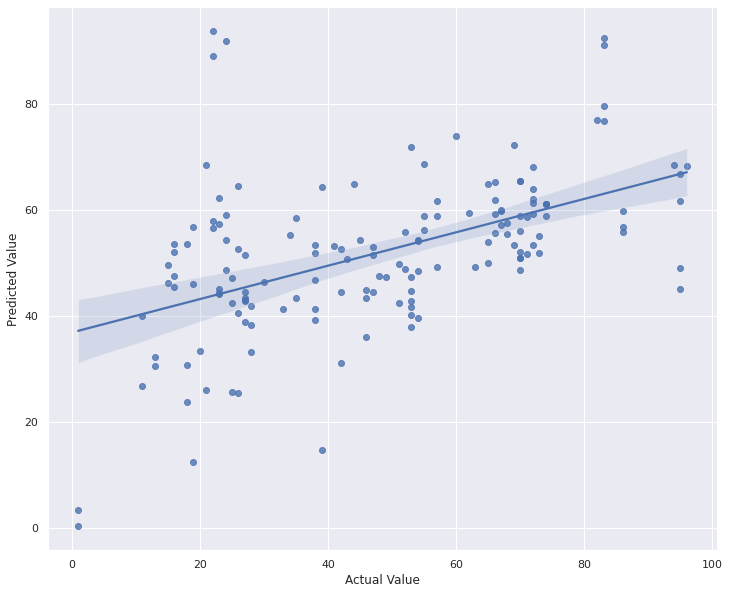

In [85]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

#Support Vector Regression (SVR) using linear and non-linear kernels

In [86]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

In [87]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -0.8550295869429108
R_sq:  0.1991713853669409


#RandomForestRegressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred_1 = regr.predict(X_test)

In [89]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_1))

r_sq = regr.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -0.6214792055846439
R_sq:  0.2592634293079621


#Ridge

[DOC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [90]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

y_pred_2 = clf.predict(X_test)

In [91]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_2))

r_sq = clf.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -1.3592520754188837
R_sq:  0.04908969128360585


#Lasso

[DOC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [92]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

y_pred_2 = clf.predict(X_test)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.073e+04, tolerance: 5.632e+00


In [93]:
from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_2))

r_sq = clf.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -0.3815907005300707
R_sq:  0.2665751027255401


#Polynomial

In [94]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit_transform(X_train)



poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X_train)





array([[1.00000000e+00, 5.35920443e+01, 5.23873859e+01, ...,
        9.95803585e+02, 7.40469266e+03, 2.06886212e+03],
       [1.00000000e+00, 3.14623192e+01, 2.84770078e+01, ...,
        9.93324103e+02, 3.90384792e+03, 2.15068796e+03],
       [1.00000000e+00, 2.56771771e+01, 2.77211806e+01, ...,
        5.00620576e+03, 6.44714554e+03, 6.38055177e+03],
       ...,
       [1.00000000e+00, 7.21993760e+01, 7.21758821e+01, ...,
        3.35730147e+04, 1.33649632e+04, 2.93001663e+04],
       [1.00000000e+00, 1.23177741e+02, 1.18736398e+02, ...,
        1.28172628e+04, 6.95543278e+03, 1.76979630e+04],
       [1.00000000e+00, 1.15003043e+02, 1.00415288e+02, ...,
        1.96368640e+05, 8.10241017e+04, 4.10215910e+04]])

**SHAP**

In [95]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


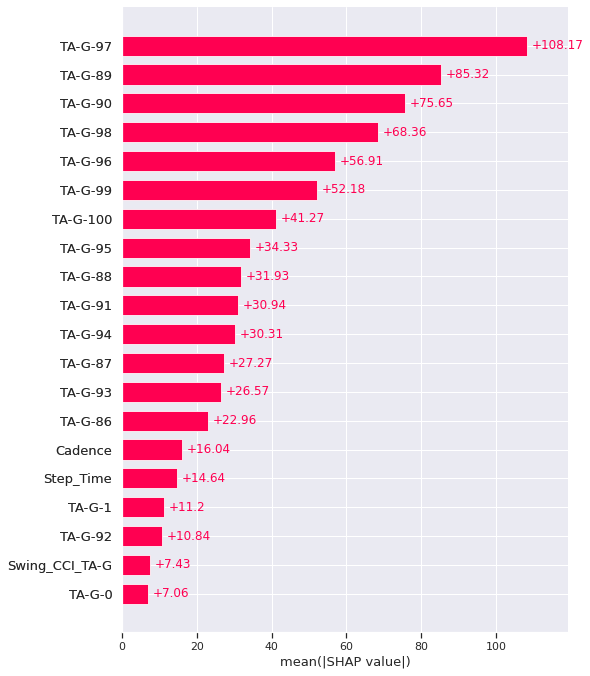

In [96]:
import pandas as pd
import shap
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer (X_train)
shap.plots.bar(shap_values,max_display=20)